,roc-auc,pr-auc,accuracy,precision,recall,f1
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.723038,0.110326,0.630482,0.064750,0.706260,0.111407
std,0.094466,0.128310,0.128994,0.061079,0.140981,0.088708
min,0.470265,0.009304,0.323328,0.007170,0.225806,0.014118
25%,0.665840,0.030240,0.538348,0.025301,0.619735,0.048183
50%,0.718513,0.066458,0.635311,0.040380,0.734655,0.076304
75%,0.783746,0.127587,0.717502,0.083051,0.807849,0.149295
max,0.944171,0.679488,0.924131,0.313113,0.961538,0.419530


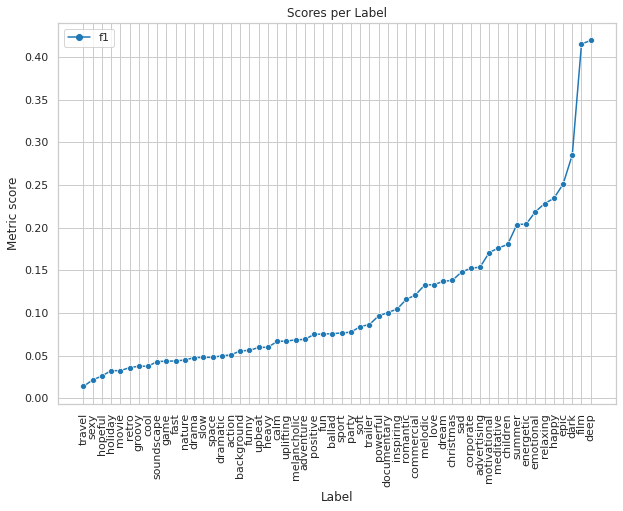

In [21]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dbispipeline.analytics import get_results_as_dataframe
from mediaeval2020.analytics import extract_metrics
from mediaeval2020.analytics import plot_per_label
from mediaeval2020.analytics import print_per_label


results = get_results_as_dataframe(project_name='mediaeval2019', table_name='mediaeval2019')
results = results[results['id'] == 63]

row = results.iloc[0]
data = extract_metrics(row)
display(data.describe())

data = data.sort_values(by=['f1'])
print_per_label(data[['f1']])
plt.show()

In [ ]:
results = results[results['date'] > '2020-08-06']
results['mean'] = results['outcome'].apply(lambda v: pd.DataFrame(v['mean']))
results['approach'] = results['sourcefile'].apply(lambda v: os.path.splitext(os.path.basename(v))[0].replace('unique_', '').replace('wide_and_deep', 'wd'))

best_results = []
for _, row in results.iterrows():
    row = pd.DataFrame(pd.concat([row, row['mean'].max(axis=1).abs()], axis=0)).transpose()

    best_results.append(row)
best_results = pd.concat(best_results)

best_results['mae'] = best_results['neg_mean_absolute_error']
best_results['rmse'] = best_results['neg_mean_squared_error'].pow(1./2)
best_results = best_results.sort_values(by=['approach'])

display(best_results[['date', 'approach', 'mae', 'rmse', 'hit_nonhit_accuracy']])

display(best_results[['approach', 'mae']].plot.bar(x='approach', y='mae', title='Wide and Deep MAE', figsize=(12, 6)))
display(best_results[['approach', 'rmse']].plot.bar(x='approach', y='rmse', title='Wide and Deep RMSE', figsize=(12, 6)))
display(best_results[['approach', 'hit_nonhit_accuracy']].plot.bar(x='approach', y='hit_nonhit_accuracy', title='Wide and Deep Hit/Non-Hit Accuracy', figsize=(12, 6)))